In [ ]:
## Problem 1: Extending the Lady Tasting Tea

In the classic Lady Tasting Tea experiment, there are 8 cups of tea:

4 cups where tea is poured first

4 cups where milk is poured first

Someone claims they can tell which cups were poured in which order.

##Extension:

Now, we increase the number of cups to 12:

8 cups are tea-first

4 cups are milk-first

The participant still claims they can tell which is which.

##Task:

You want to simulate this experiment in Python (using numpy):

Randomly mix (shuffle) the cups many times.

For each shuffle, "pretend" the participant is guessing.

Calculate how often the participant would get them all correct just by luck (i.e., by randomly guessing).

Then, compare:

What is the chance of getting them all right (just by chance) in the 12-cup version?

How does this compare to the original 8-cup version?



In [2]:
# Import required libraries

# https://numpy.org/doc/stable/
import numpy as np

# https://matplotlib.org/
import matplotlib.pyplot as plt
plt.style.use('ggplot')  # Use ggplot style

import math

In [2]:
import numpy as np

# Make an array of numbers from 1 to 12
cups = np.arange(1, 13)

# Randomly mix the cups
np.random.shuffle(cups)

# Show the mixed order
print(cups)


[ 3  9  4 10 12  5  6  2  1  7 11  8]


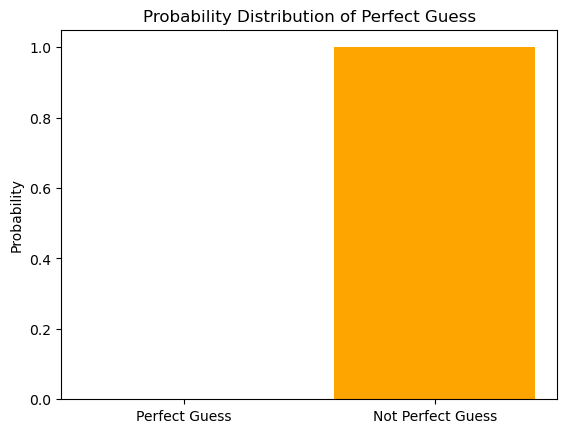

In [4]:
import matplotlib.pyplot as plt

num_trials = 10000  # Number of simulations
success_count = 0

for _ in range(num_trials):
    cups = np.arange(1, 13)  # Cups numbered 1 to 12
    np.random.shuffle(cups)  # Shuffle cups randomly

    # Check if the shuffled order matches the original order (perfect guess)
    if np.array_equal(cups, np.arange(1, 13)):
        success_count += 1

# Calculate probabilities
prob_success = success_count / num_trials
prob_failure = 1 - prob_success

# Data for bar plot
labels = ['Perfect Guess', 'Not Perfect Guess']
probabilities = [prob_success, prob_failure]

# Create bar plot
plt.bar(labels, probabilities, color=['green', 'orange'])
plt.ylabel('Probability')
plt.title('Probability Distribution of Perfect Guess')
plt.show()
